# Podstawy Przetwarzania Dużych Zbiorów Danych

Grupa IBD4 Poniedziałki 8:30

Łukasz Moskwa 247739

Artur Szewczykowski 252546


# 0.0 Importy

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec

sns.set_theme(style='whitegrid')

def plot_rolling_stats_subplots(df, metric_name, window=7, figsize=(14, 12)):
    """
    Generuje podwójny wykres w subplotach z separacją:
    - górny: tylko średnia krocząca
    - dolny: średnia + odchylenie + wypełniony obszar
    
    Parametry:
    ----------
    df : DataFrame
        Zbiór danych
    metric_name : str
        Nazwa metryki (np. 'Nowe_zachorowania')
    window : int
        Okno dla średniej kroczącej
    figsize : tuple
        Rozmiar wykresu
    """
    # Utworzenie figury z GridSpec
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(3, 1, height_ratios=[1, 0.05, 1])  # 3 wiersze: wykres, linia, wykres
    
    # Górny wykres - średnia krocząca
    ax1 = fig.add_subplot(gs[0])
    sns.lineplot(data=df, x='date', y=f'{metric_name}_srednia_{window}dni',
                label=f'Średnia {window}-dniowa', color='darkblue', linewidth=2, ax=ax1, errorbar=None)
    ax1.set(title=f'{metric_name.replace("_", " ")} - średnia {window}-dniowa', 
           ylabel='Liczba',
           xlabel='')
    ax1.legend()
    ax1.grid(True)
    
    # Czarna linia oddzielająca
    ax_line = fig.add_subplot(gs[1])
    ax_line.axis('off')
    ax_line.axhline(y=0.5, color='black', linewidth=2)
    
    # Dolny wykres - analiza zmienności
    ax2 = fig.add_subplot(gs[2])
    sns.lineplot(data=df, x='date', y=f'{metric_name}_srednia_{window}dni',
                label=f'Średnia {window}-dniowa', color='darkblue', linewidth=2, ax=ax2, errorbar=None)
    sns.lineplot(data=df, x='date', y=f'{metric_name}_odchylenie_{window}dni',
                label=f'Odchylenie {window}-dniowe', color='red', linewidth=1.5, alpha=0.5, ax=ax2, errorbar=None)
    ax2.fill_between(df['date'],
                    df[f'{metric_name}_srednia_{window}dni'] - df[f'{metric_name}_odchylenie_{window}dni'],
                    df[f'{metric_name}_srednia_{window}dni'] + df[f'{metric_name}_odchylenie_{window}dni'],
                    color='skyblue', alpha=0.3, label=f'Zakres ±1σ ({window} dni)')
    ax2.set(title=f'{metric_name.replace("_", " ")} - analiza zmienności', 
           xlabel='Data', 
           ylabel='Liczba')
    ax2.legend()
    ax2.grid(True)
    
    # Wspólne formatowanie
    for ax in [ax1, ax2]:
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'.replace(',', ' ')))
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

df_data = pd.read_csv("../Poziom_1/wyniki/final_data.csv")
df_data['date'] = pd.to_datetime(df_data['date'])
df_data = df_data.sort_values('date')
df_europe = df_data[df_data['Continent'] == 'Europe'].copy()
df_europe

,Country_name,3_letter_code,population_urban,gdp_per_capita_usd,GDP_2022,date,Total_confirmed_cases,Total_new_deceased,Total_new_vaccinations,New_persons_fully_vaccinated,...,Murders_Rate_2012,Murders_Rate_2013,Murders_Rate_2014,Murders_Rate_2015,Murders_Rate_2016,Murders_Rate_2017,Murders_Rate_2018,Murders_Rate_2019,Murders_Rate_2020,Murders_Rate_2021
250,Latvia,LVA,1304943.0,17818.0,3.420999e+10,2020-12-07,712,5,1.0,NaN,...,3.408588,2.461252,3.182435,3.363531,3.496369,4.143514,4.339671,3.391501,3.689936,3.041754
12709,Norway,NOR,4418218.0,75419.0,4.018484e+11,2020-12-08,392,2,5.0,NaN,...,0.537950,0.905393,0.564430,0.462396,0.515603,0.530565,0.470604,0.523533,0.576225,0.536737
12710,Norway,NOR,4418218.0,75419.0,4.018484e+11,2020-12-09,453,0,1.0,NaN,...,0.537950,0.905393,0.564430,0.462396,0.515603,0.530565,0.470604,0.523533,0.576225,0.536737
251,Latvia,LVA,1304943.0,17818.0,3.420999e+10,2020-12-09,680,15,1.0,NaN,...,3.408588,2.461252,3.182435,3.363531,3.496369,4.143514,4.339671,3.391501,3.689936,3.041754
12711,Norway,NOR,4418218.0,75419.0,4.018484e+11,2020-12-10,435,21,1.0,NaN,...,0.537950,0.905393,0.564430,0.462396,0.515603,0.530565,0.470604,0.523533,0.576225,0.536737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18512,Czech Republic,CZE,7887156.0,23010.0,2.450519e+11,2022-09-13,3020,5,84.0,82.0,...,0.998947,0.855957,0.770168,0.836200,0.617425,0.626703,NaN,0.920577,0.731178,0.447161
9852,Austria,AUT,5194416.0,51448.0,4.557663e+11,2022-09-13,6177,1,98.0,0.0,...,0.960896,0.719379,0.491454,0.509117,0.618097,0.795681,0.972794,0.867123,0.729699,0.728530
28383,Italy,ITA,42651966.0,34456.0,2.079749e+12,2022-09-13,23161,93,306.0,216.0,...,0.880543,0.832330,0.787430,0.778644,0.672005,0.626625,0.599558,0.530740,0.478987,0.511476
28384,Italy,ITA,42651966.0,34456.0,2.079749e+12,2022-09-14,18854,69,239.0,222.0,...,0.880543,0.832330,0.787430,0.778644,0.672005,0.626625,0.599558,0.530740,0.478987,0.511476


# Część 1: Analiza danych

In [58]:
columns: dict = {
    'Nowe_zachorowania': 'Total_confirmed_cases',
    'Nowe_zgony': 'Total_new_deceased',
    'Nowe_szczepienia': 'Total_new_vaccinations',
    'Nowe_pełne_szczepienia': 'New_persons_fully_vaccinated',
    'Nowe_testy': 'Total_tested'
}

df_europe_ex1 = df_europe[['date', 'Country_name'] + list(columns.values())].copy()

for key, value in columns.items():
    df_europe_ex1[f'{key}_srednia_7dni'] = df_europe_ex1[value].rolling(window=7).mean()
    df_europe_ex1[f'{key}_odchylenie_7dni'] = df_europe_ex1[value].rolling(window=7).std()

display(df_europe_ex1)

,date,Country_name,Total_confirmed_cases,Total_new_deceased,Total_new_vaccinations,New_persons_fully_vaccinated,Total_tested,Nowe_zachorowania_srednia_7dni,Nowe_zachorowania_odchylenie_7dni,Nowe_zgony_srednia_7dni,Nowe_zgony_odchylenie_7dni,Nowe_szczepienia_srednia_7dni,Nowe_szczepienia_odchylenie_7dni,Nowe_pełne_szczepienia_srednia_7dni,Nowe_pełne_szczepienia_odchylenie_7dni,Nowe_testy_srednia_7dni,Nowe_testy_odchylenie_7dni
250,2020-12-07,Latvia,712,5,1.0,NaN,9764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12709,2020-12-08,Norway,392,2,5.0,NaN,18928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12710,2020-12-09,Norway,453,0,1.0,NaN,19328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,2020-12-09,Latvia,680,15,1.0,NaN,9642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12711,2020-12-10,Norway,435,21,1.0,NaN,17819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18512,2022-09-13,Czech Republic,3020,5,84.0,82.0,6575,3268.285714,2683.977131,9.571429,14.478227,117.285714,125.933466,76.285714,85.519422,19090.857143,21965.575866
9852,2022-09-13,Austria,6177,1,98.0,0.0,105278,4146.714286,2442.065704,9.714286,14.372593,131.285714,115.757957,76.285714,85.519422,34126.000000,37366.460121
28383,2022-09-13,Italy,23161,93,306.0,216.0,184211,6580.142857,7658.901323,19.000000,34.732310,130.000000,113.403409,89.571429,99.986428,57534.714286,66929.649346
28384,2022-09-14,Italy,18854,69,239.0,222.0,171457,8357.142857,8948.638731,24.142857,39.490204,124.285714,105.367158,86.571429,94.796022,73811.571429,79583.501385


## 1.1 Liczby nowych zachorowań

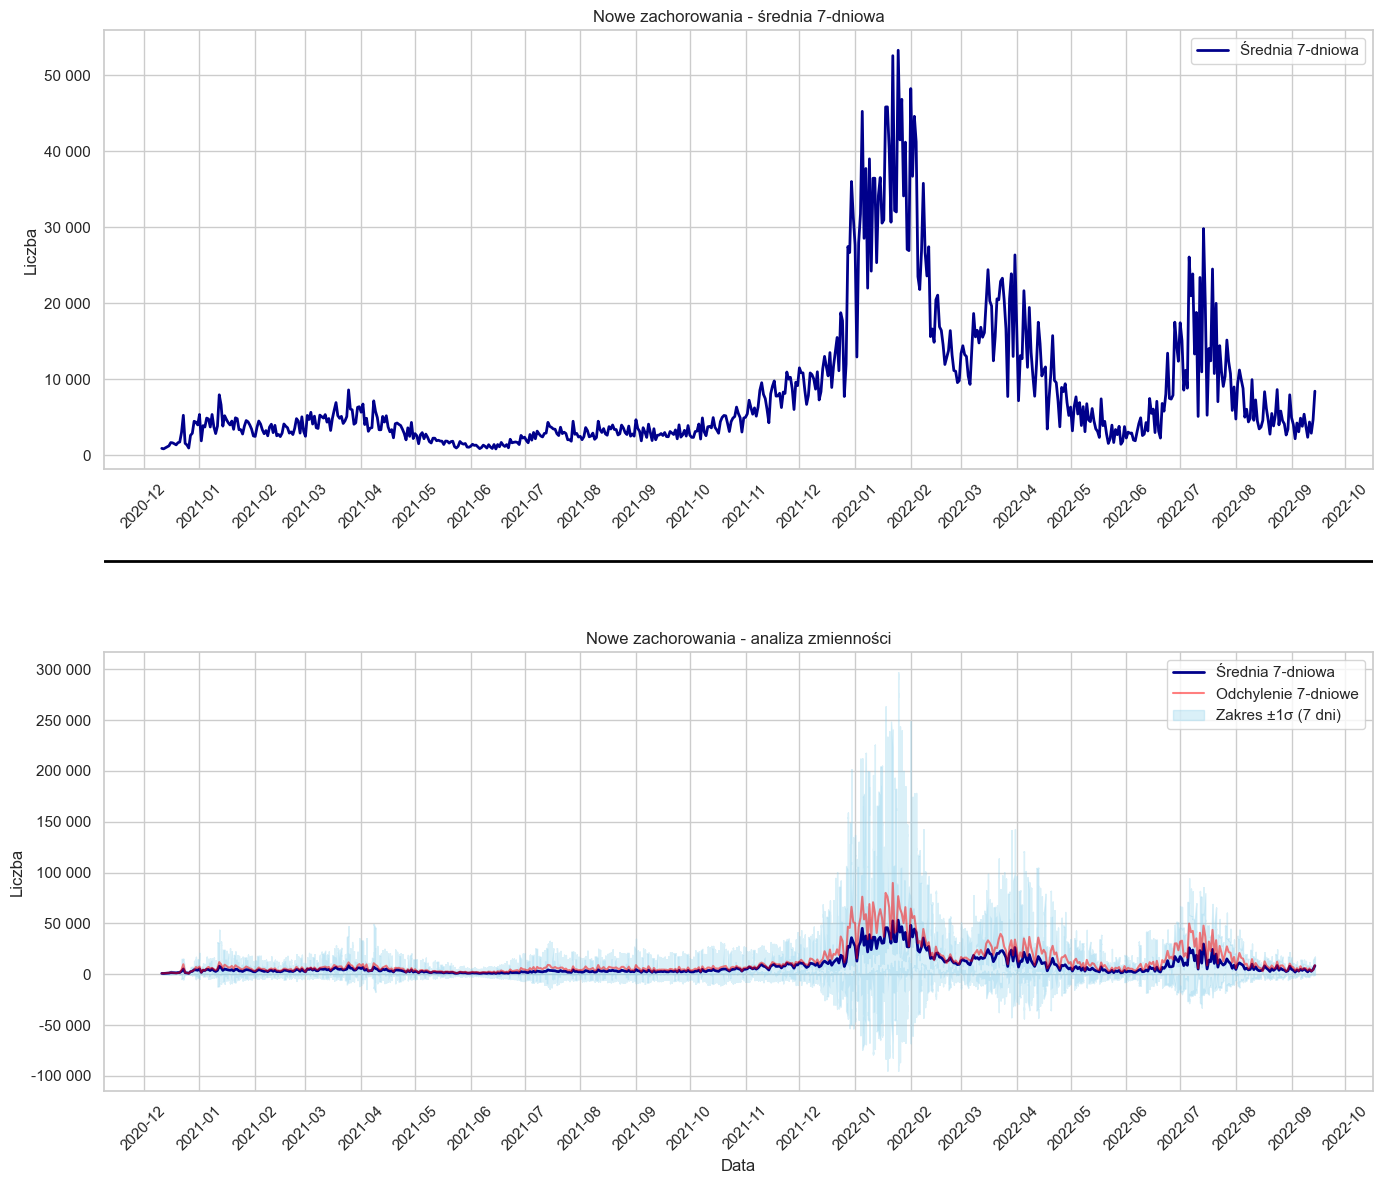

In [6]:
plot_rolling_stats_subplots(df_europe_ex1, 'Nowe_zachorowania')

Wnioski:
1. Widzimy bardzo dużo nowych zachorowań po 2 latach od pojawieenia się wirusa. 
2. Obserwujemy, że w okresach około świątecznych oraz wakacyjnych wzrasta liczba zachorowań.
3. Zauważamy również fakt, w czasie liczniejszych wysypów zachorowań bardzo mocno rośnie wartość odchylenia standardowego.

# 1.2 Liczba nowych śmierci

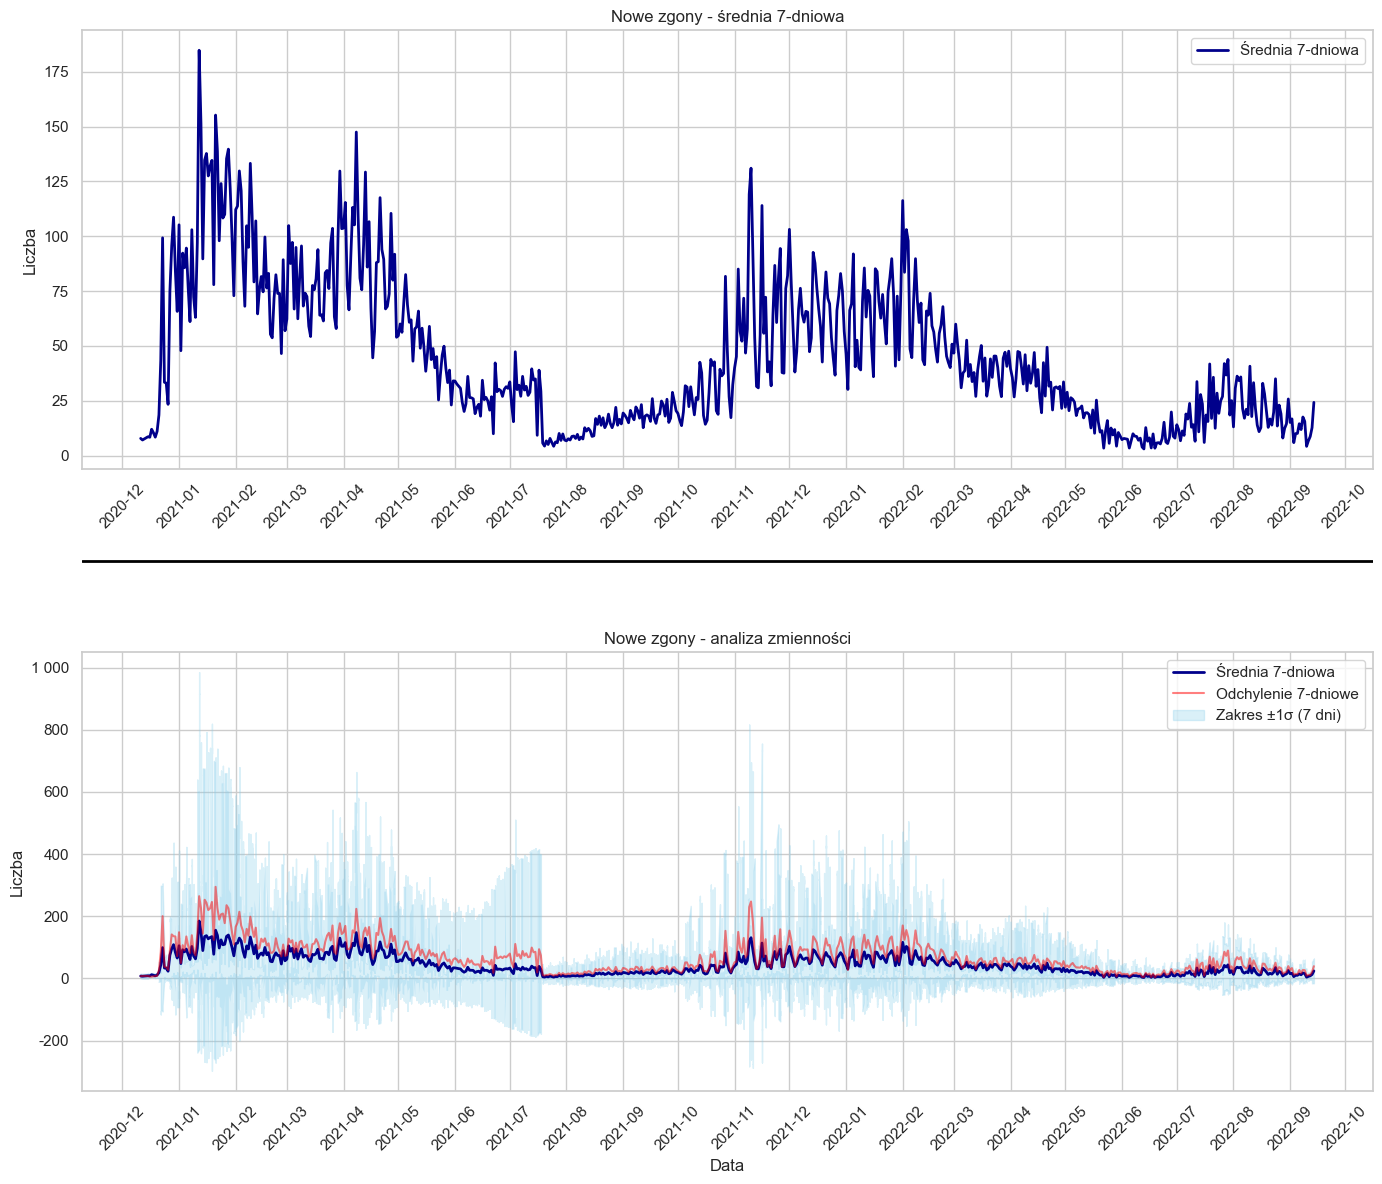

In [7]:
plot_rolling_stats_subplots(df_europe_ex1, 'Nowe_zgony')

Wnioski:
1. Na początku 2021 roku wprowadzano lockdown w większości państw europejskich oraz zaczęto szczepienia. Co przyczyniło się do prawie zerowych zgonów w Europie.
2. Po zmniejszeniu ograniczeń ponownie widać rosnącą liczbę zgonów.
3. Po 2021 roku liczba zgonów zaczeła poważnie maleć co może pokazywać, że ludzie nabierali odporności zbiorowej.

# 1.3 Liczba nowych szczepień

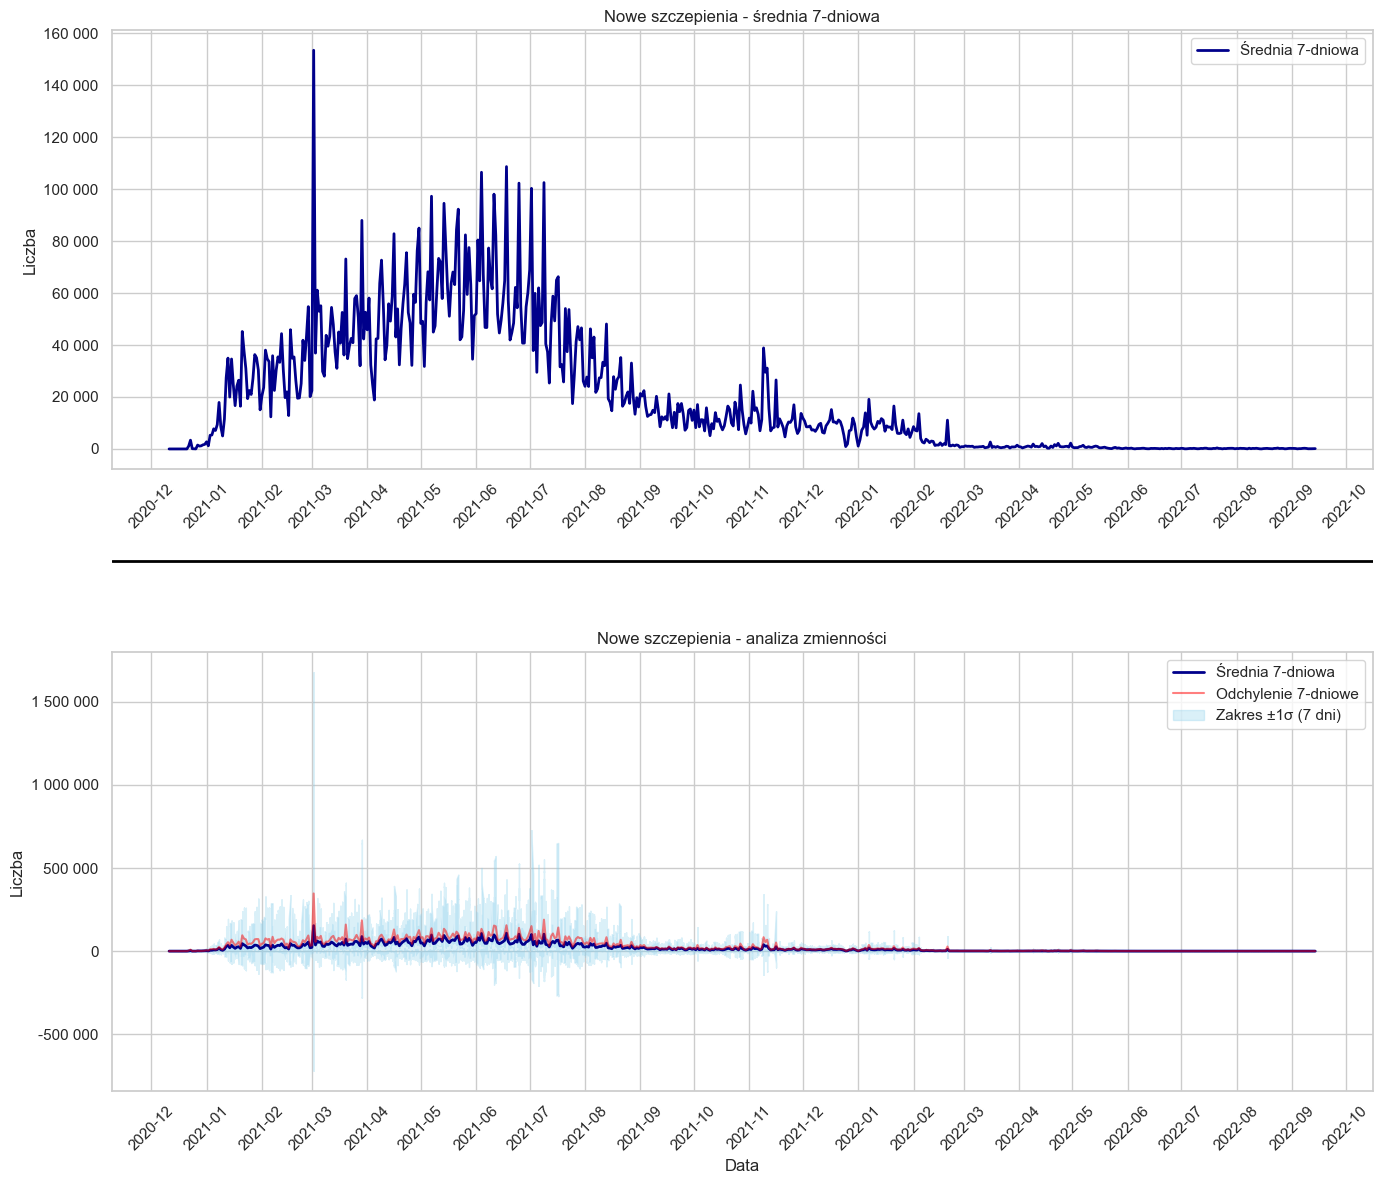

In [8]:
plot_rolling_stats_subplots(df_europe_ex1, 'Nowe_szczepienia')

Wnioski:
1. Duża liczba szczepień zaraz po ich wprowadzeniu. Nastepnie stopniowo mniejsze zainteresowanie szczepieniami.

# 1.4 Liczba w pełni zaszczepionych

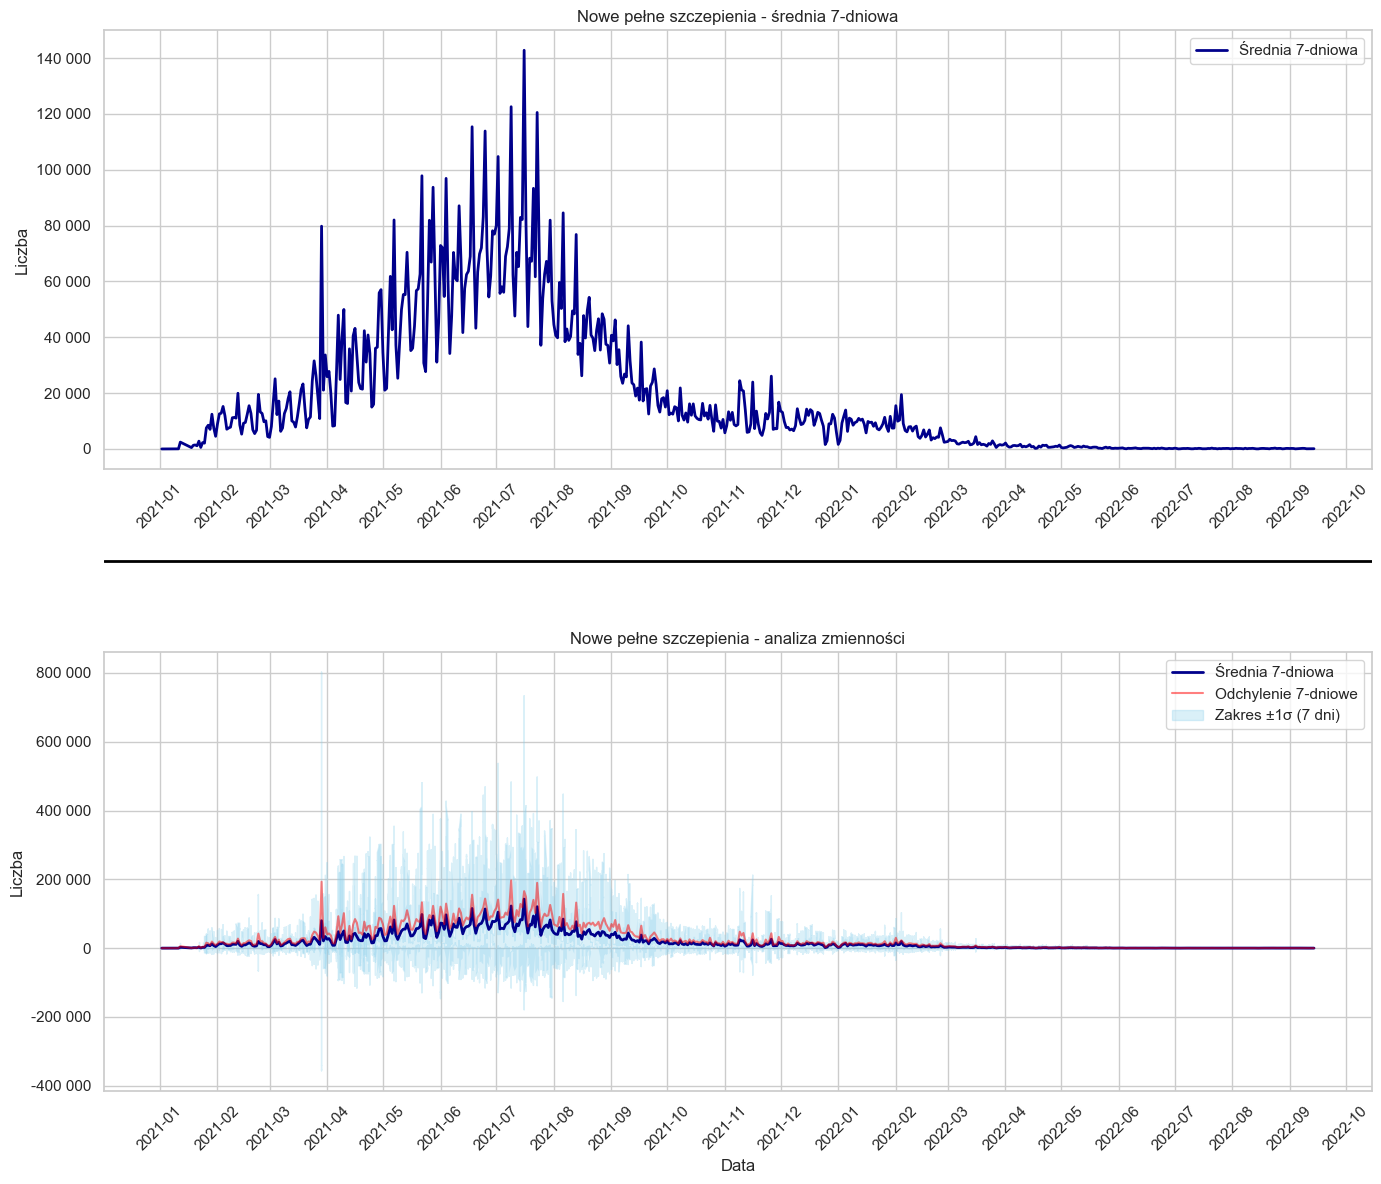

In [9]:
plot_rolling_stats_subplots(df_europe_ex1, 'Nowe_pełne_szczepienia')

Wnioski:
1. Duża liczba szczepień zaraz po ich wprowadzeniu. Nastepnie stopniowo mniejsze zainteresowanie szczepieniami.
2. Bardzo ładnie widać przesunięcie trendu w czasie względem zwykłych szczepień.

# 1.5 Liczba testów

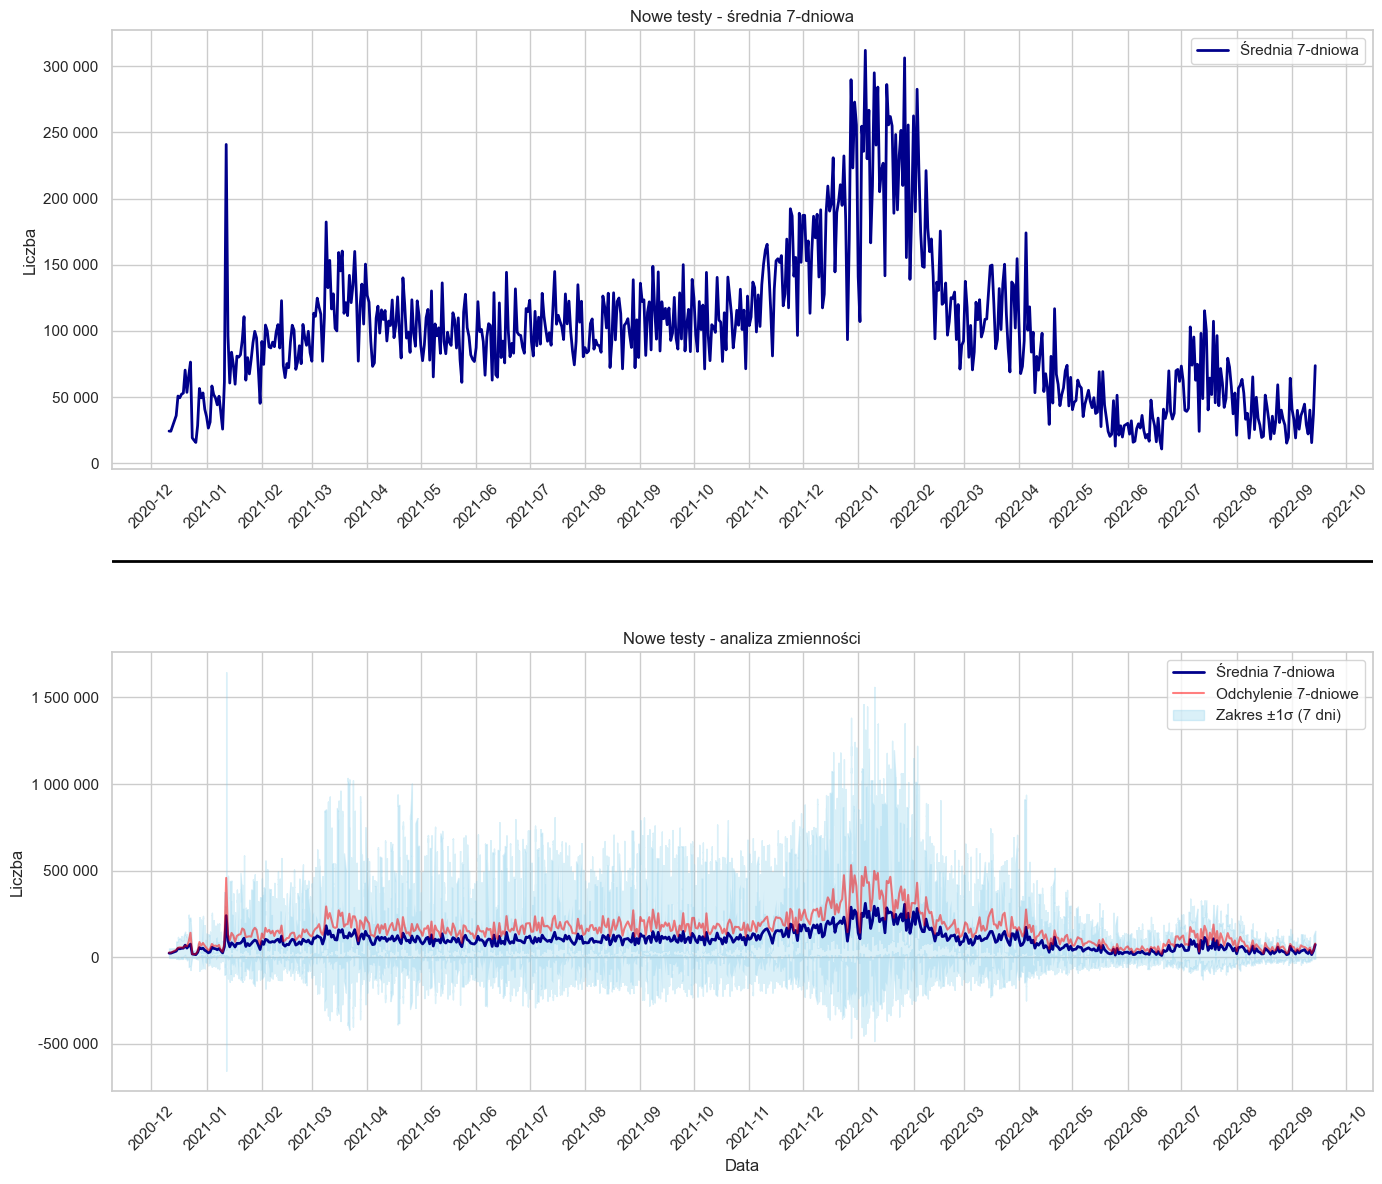

In [10]:
plot_rolling_stats_subplots(df_europe_ex1, 'Nowe_testy')

Wnioski:
1. Wyglądaja jak nałożenie na siebie wykresów zachorowań i śmierci.
2. Testy przez prawie cały okres trwania COVID19 utrzymywały się na podobnym poziomie.
3. Zauważamy, że w okresie świąt Bożego Narodzenia 2021 oraz zimy 2021-2022 wykonywano więcej testów niż zwykle

# Część 2 - Szeregi czasowe

Do analizy szeregów czasowych możemy stosować: średnie ruchome, dekompozycje oraz ARIMA (Autoregressive Integrated Moving Average), SARIMA (ARIMA ale z sezonowością).

In [11]:
import statsmodels.api as sm

df_europe_ex2 = df_europe_ex1.copy()

df_europe_ex2.set_index('date', inplace=True)
df_europe_ex2.index = pd.to_datetime(df_europe_ex2.index)


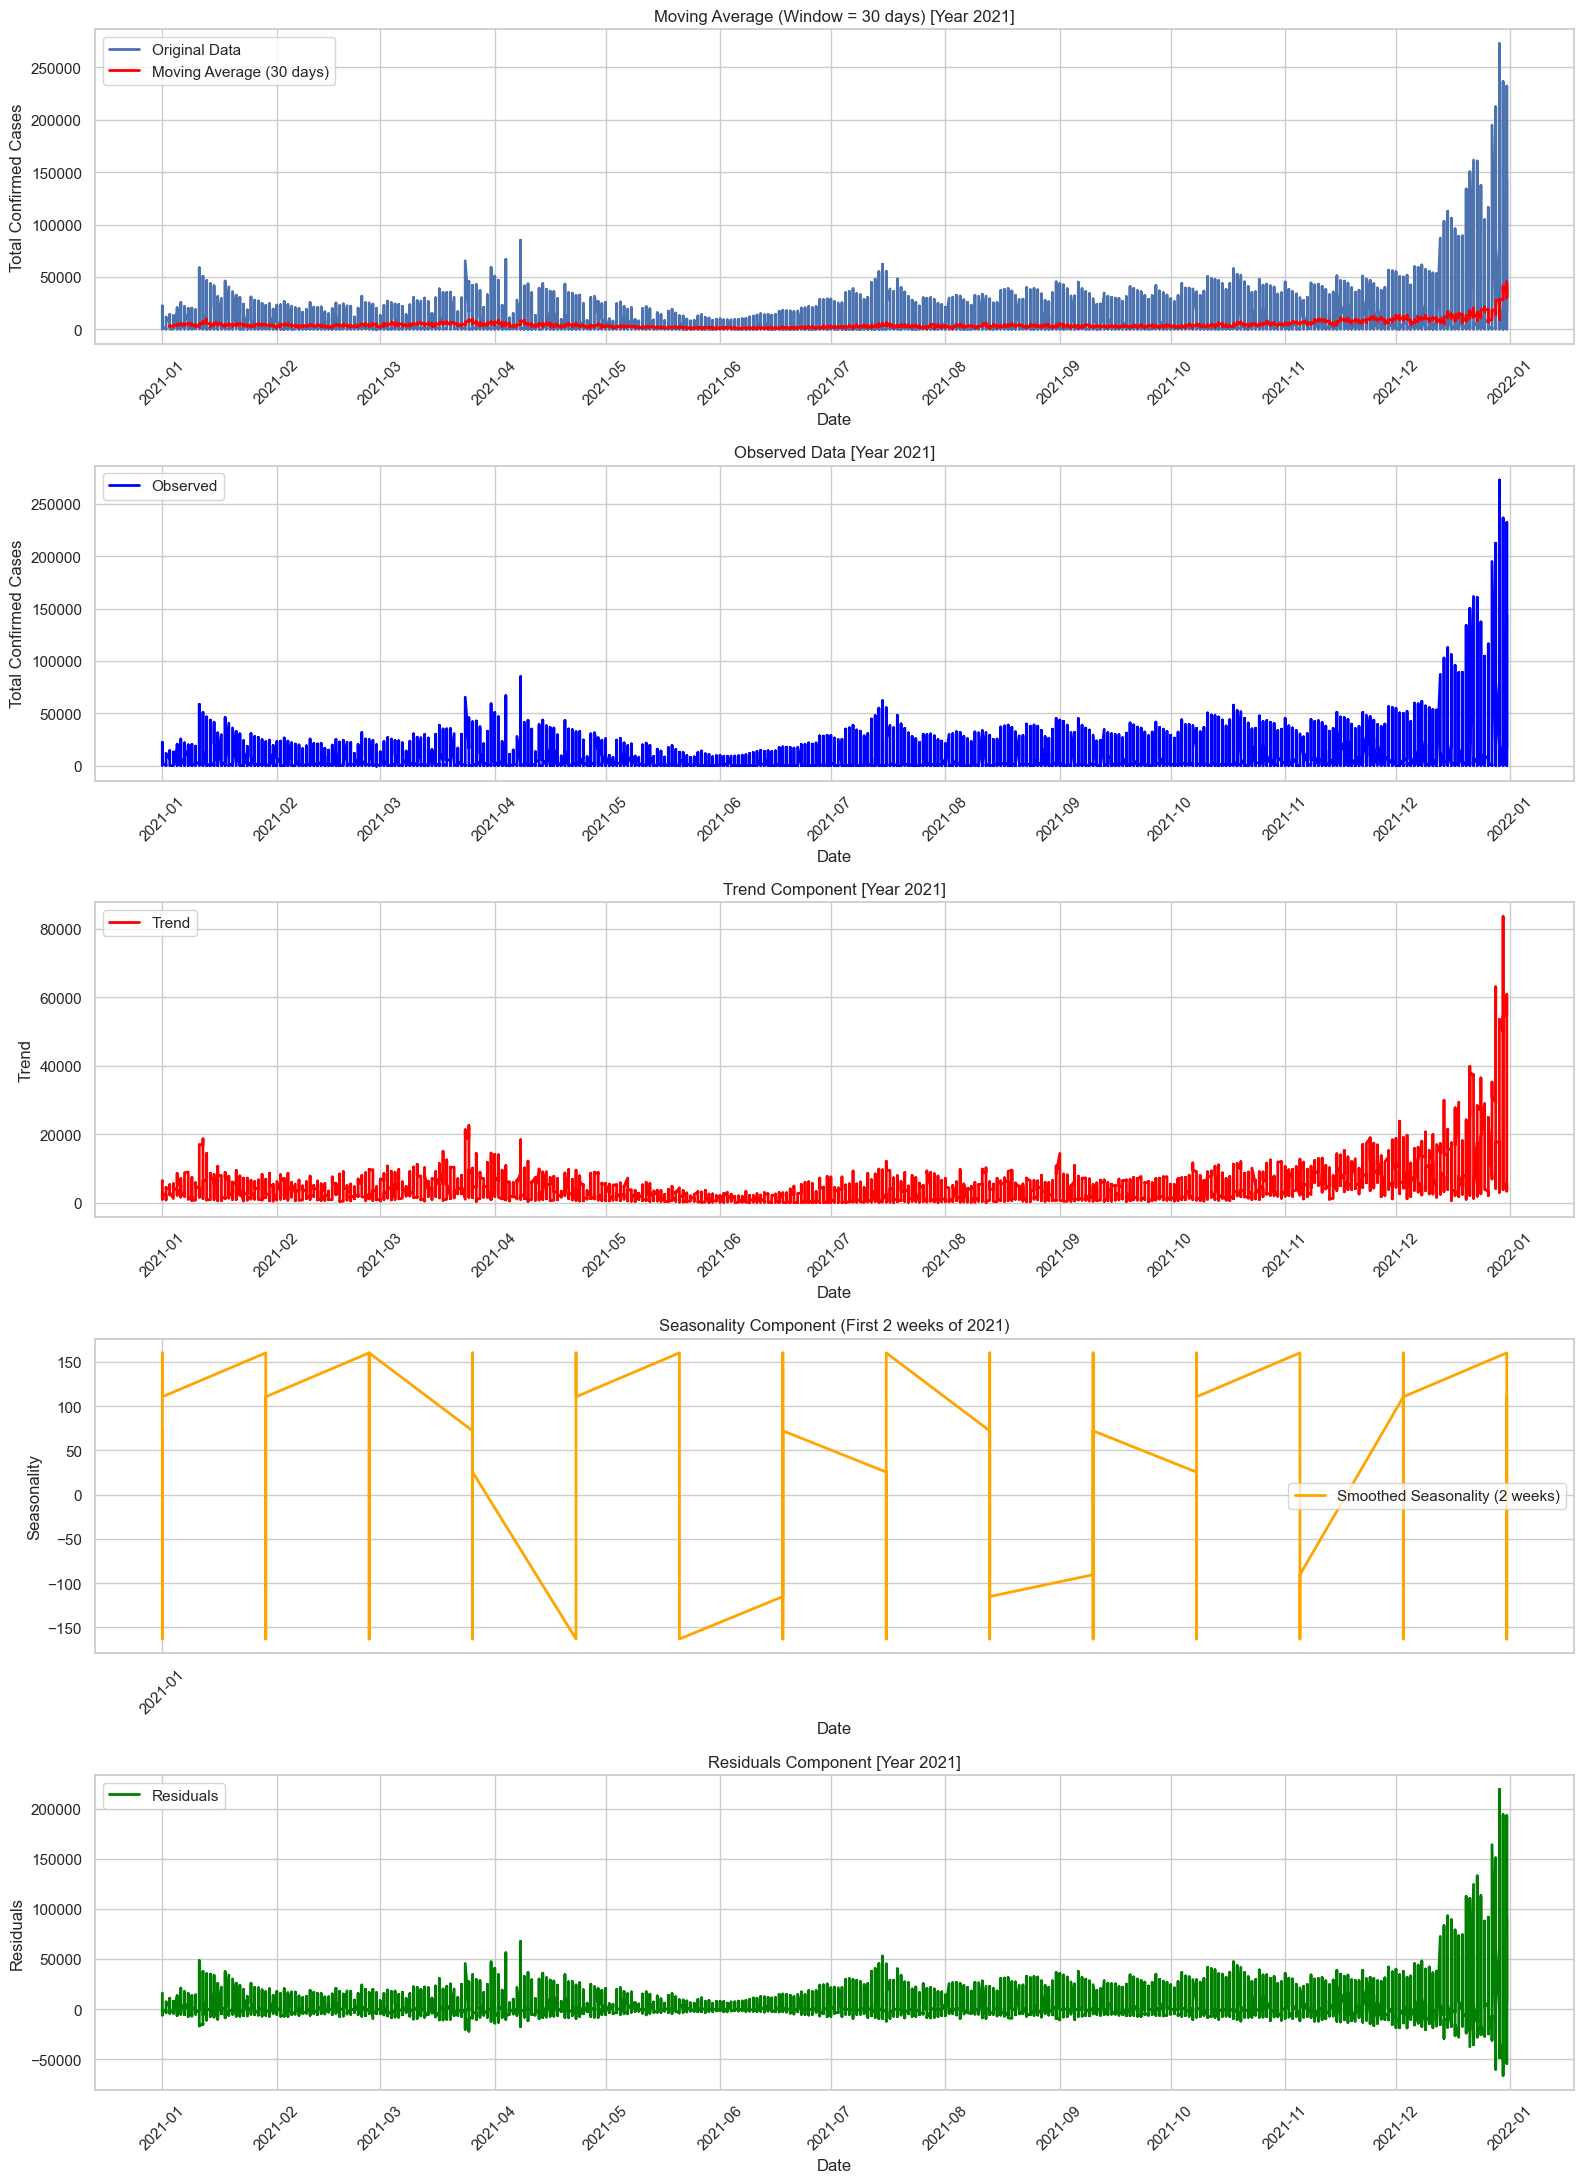

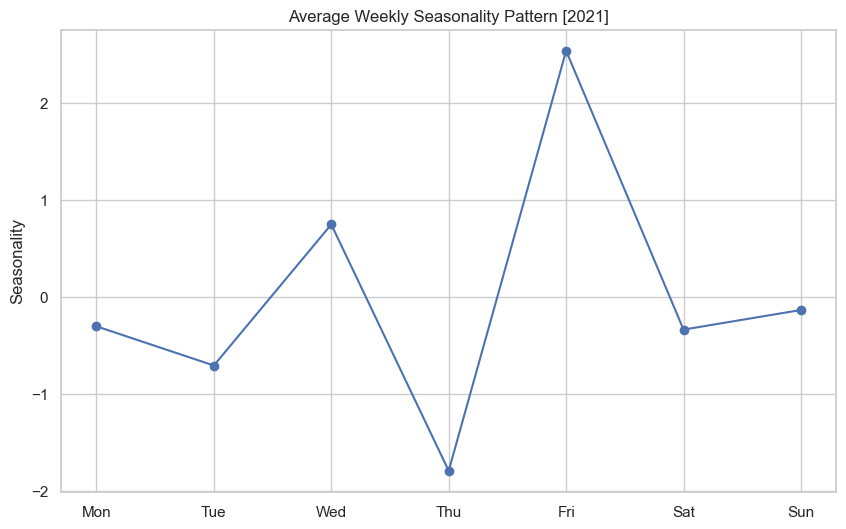

In [12]:

# --- Przygotowanie danych ---
y_full = df_europe_ex2['Total_confirmed_cases'].dropna()

# Wybieramy dane tylko z roku 2021
y = y_full[(y_full.index >= '2021-01-01') & (y_full.index <= '2021-12-31')]

# --- Parametry ---
period = 7   # Okres sezonowości (np. tygodniowa sezonowość)
window = 30  # Okno dla średniej ruchomej (30 dni)

# --- Dekompozycja ---
decomposition = sm.tsa.seasonal_decompose(y, model='additive', period=period)

# --- Tworzenie wykresów ---
fig, axes = plt.subplots(5, 1, figsize=(16, 22))  # 5 wykresów: średnia ruchoma + 4 komponenty dekompozycji

# 1. Średnia ruchoma
rolling_mean = y.rolling(window=window).mean()
axes[0].plot(y.index, y.values, label='Original Data', linewidth=2)
axes[0].plot(rolling_mean.index, rolling_mean.values, label=f'Moving Average ({window} days)', color='red', linewidth=2)
axes[0].set_title(f'Moving Average (Window = {window} days) [Year 2021]')
axes[0].set_ylabel('Total Confirmed Cases')
axes[0].legend()
axes[0].grid(True)

# 2. Observed (Oryginalne dane)
axes[1].plot(decomposition.observed.index, decomposition.observed.values, label='Observed', color='blue', linewidth=2)
axes[1].set_title('Observed Data [Year 2021]')
axes[1].set_ylabel('Total Confirmed Cases')
axes[1].legend()
axes[1].grid(True)

# 3. Trend
axes[2].plot(decomposition.trend.index, decomposition.trend.values, label='Trend', color='red', linewidth=2)
axes[2].set_title('Trend Component [Year 2021]')
axes[2].set_ylabel('Trend')
axes[2].legend()
axes[2].grid(True)

# 4. Seasonality (WYGŁADZONA)
seasonality_subset = decomposition.seasonal[(decomposition.seasonal.index >= '2021-01-01') & (decomposition.seasonal.index <= '2021-01-14')]
# wygładzamy sezonowość dla płynności
seasonality_smooth = seasonality_subset.rolling(window=3, center=True).mean()

axes[3].plot(seasonality_smooth.index, seasonality_smooth.values, label='Smoothed Seasonality (2 weeks)', color='orange', linewidth=2)
axes[3].set_title('Seasonality Component (First 2 weeks of 2021)')
axes[3].set_ylabel('Seasonality')
axes[3].legend()
axes[3].grid(True)

# 5. Residuals
axes[4].plot(decomposition.resid.index, decomposition.resid.values, label='Residuals', color='green', linewidth=2)
axes[4].set_title('Residuals Component [Year 2021]')
axes[4].set_ylabel('Residuals')
axes[4].legend()
axes[4].grid(True)

# --- Formatowanie osi X (daty) ---
for ax in axes:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Date')

# --- Wyświetlenie wykresów ---
plt.tight_layout()
plt.show()

# --- Dodatkowy wykres: Średni wzorzec tygodniowy sezonowości ---
# Tworzenie wzorca tygodniowego
seasonality = decomposition.seasonal
dow = seasonality.index.dayofweek  # Monday=0, Sunday=6
weekly_pattern = seasonality.groupby(dow).mean()

# Wykres wzorca tygodniowego
plt.figure(figsize=(10, 6))
plt.plot(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], weekly_pattern.values, marker='o', linestyle='-')
plt.title('Average Weekly Seasonality Pattern [2021]')
plt.ylabel('Seasonality')
plt.grid(True)
plt.show()


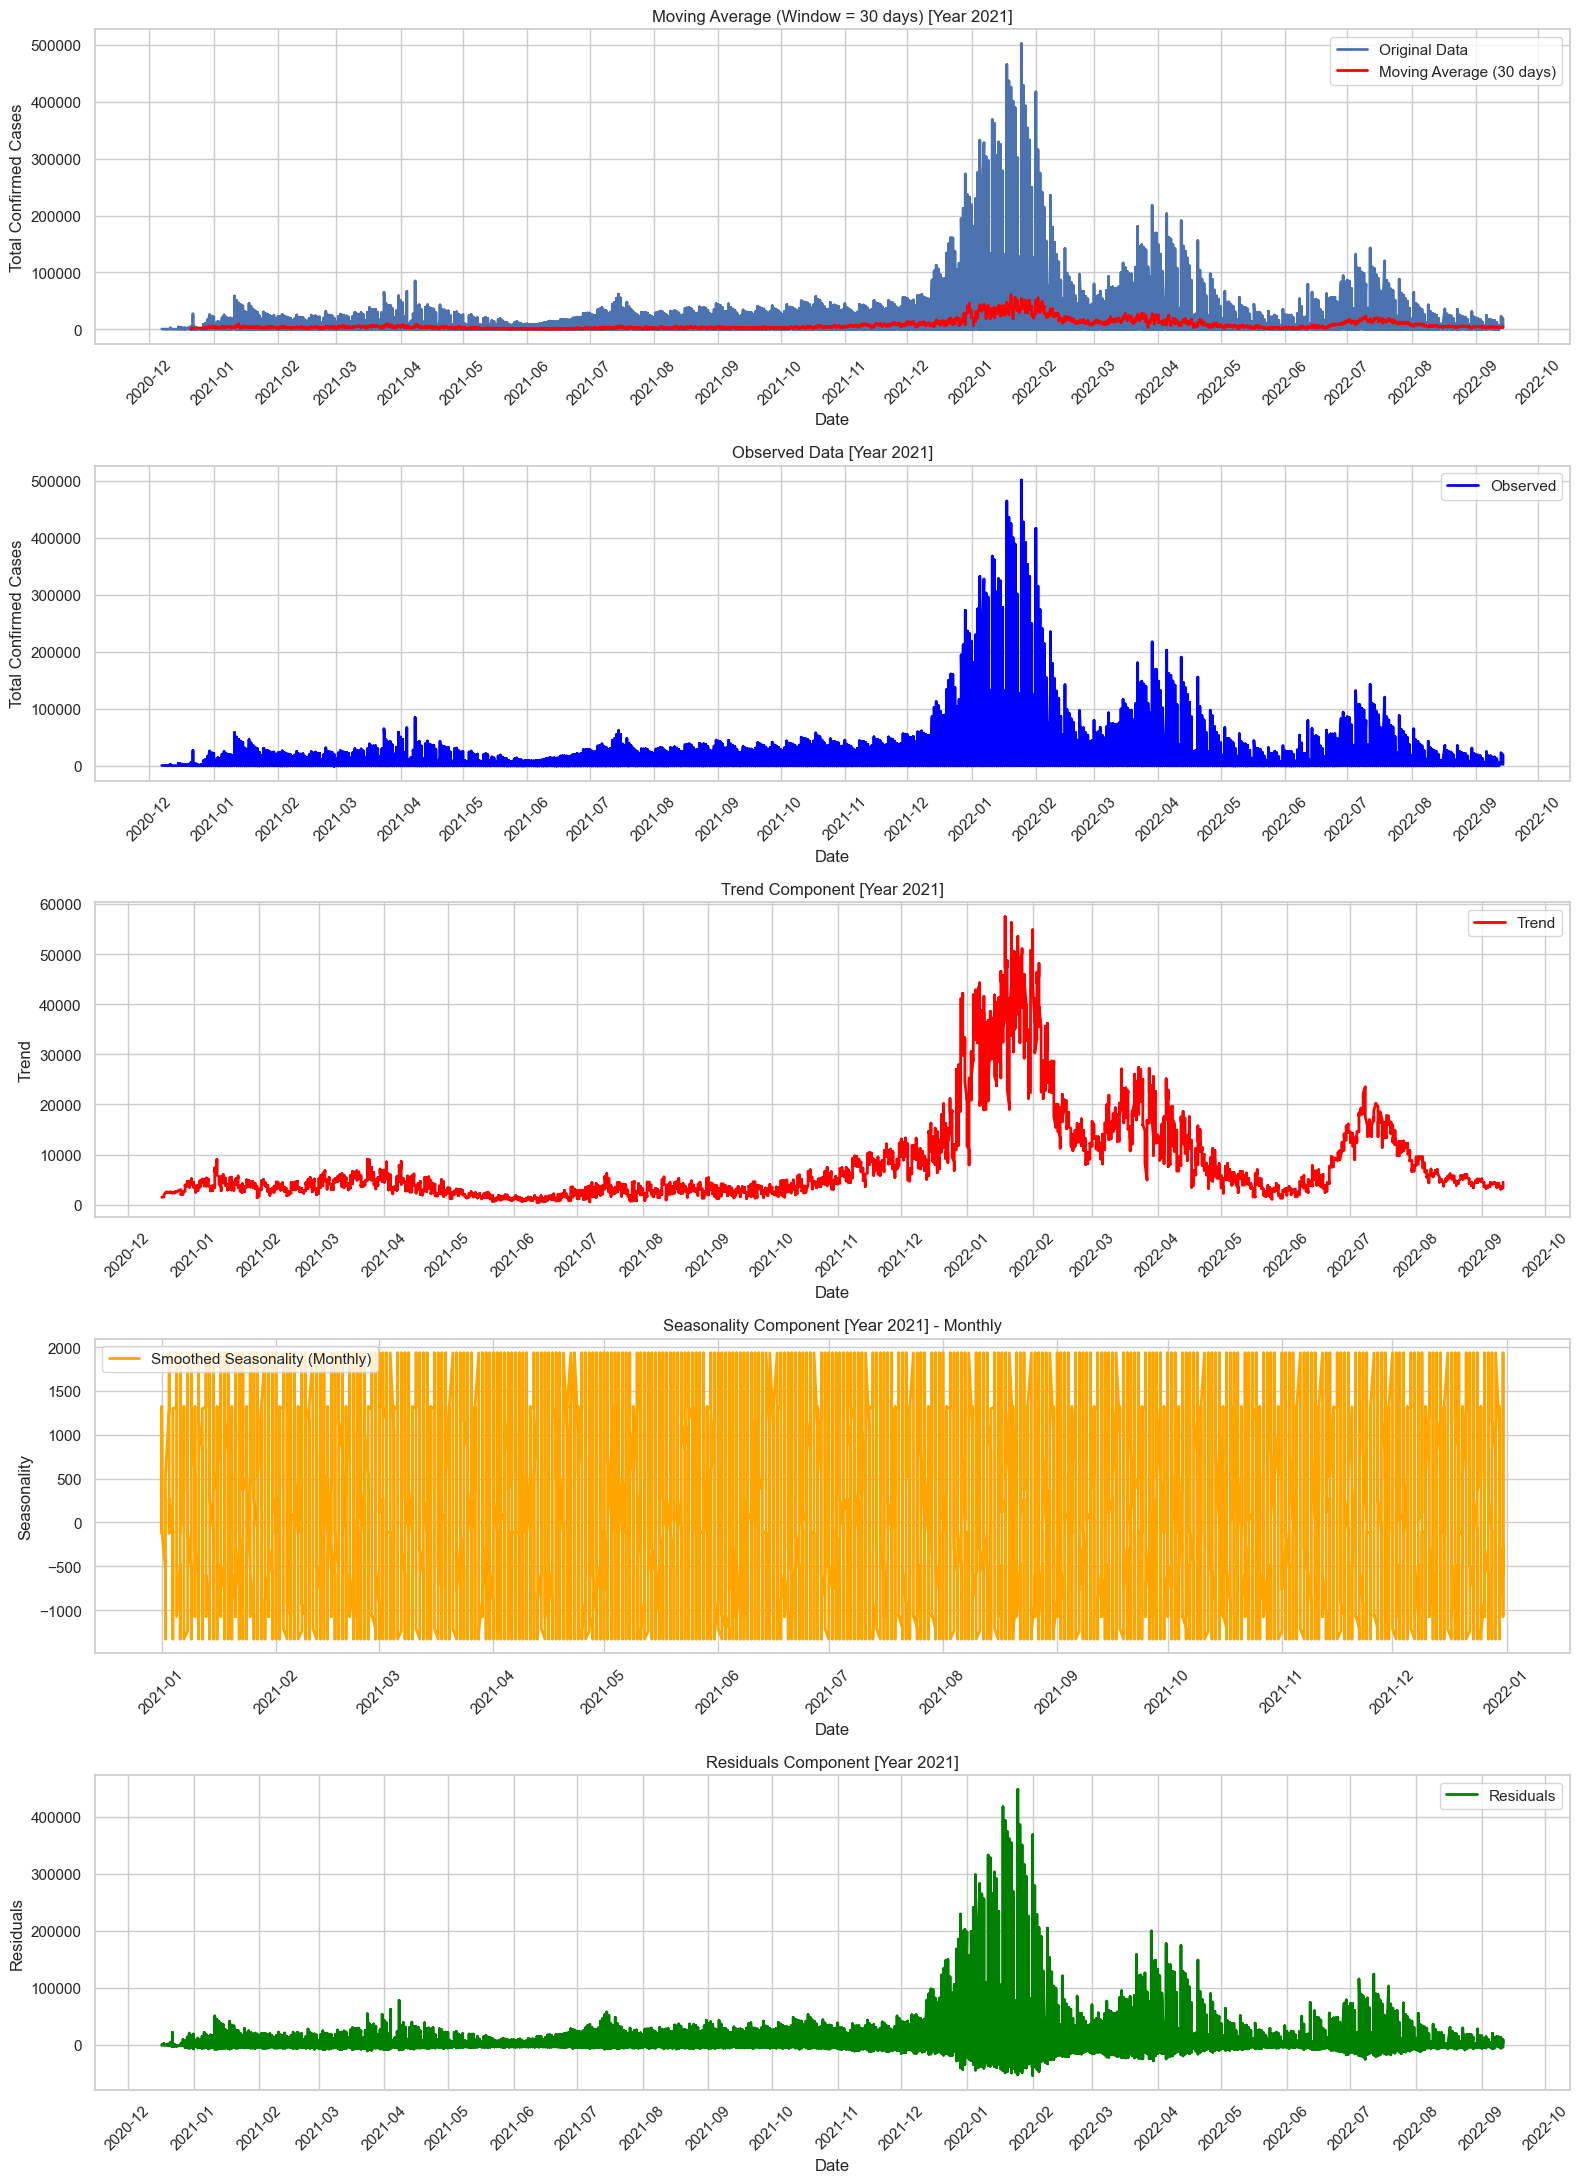

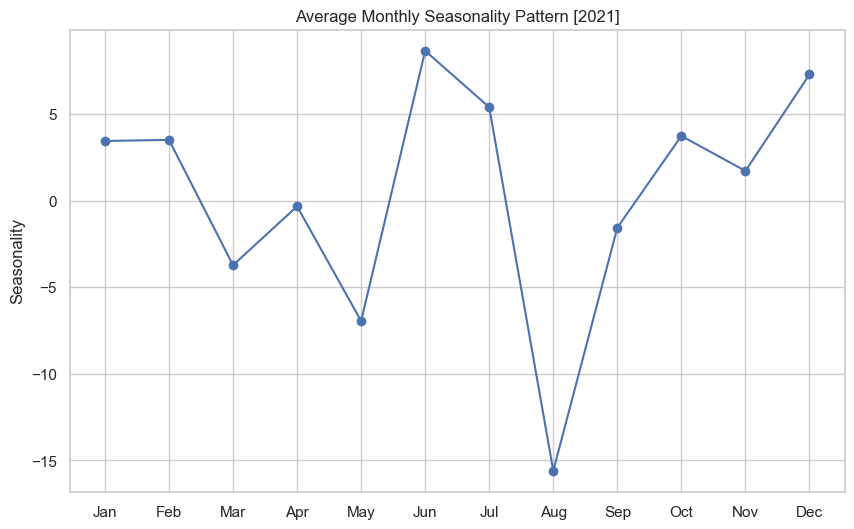

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib.dates as mdates

# --- Przygotowanie danych ---
y = df_europe_ex2['Total_confirmed_cases'].dropna()

# --- Parametry ---
period = 30  # Okres sezonowości (miesięczna sezonowość - 30 dni)
window = 30  # Okno dla średniej ruchomej (30 dni)

# --- Dekompozycja ---
decomposition = sm.tsa.seasonal_decompose(y, model='additive', period=period)

# --- Tworzenie wykresów ---
fig, axes = plt.subplots(5, 1, figsize=(16, 22))  # 5 wykresów: średnia ruchoma + 4 komponenty dekompozycji

# 1. Średnia ruchoma
rolling_mean = y.rolling(window=window).mean()
axes[0].plot(y.index, y.values, label='Original Data', linewidth=2)
axes[0].plot(rolling_mean.index, rolling_mean.values, label=f'Moving Average ({window} days)', color='red', linewidth=2)
axes[0].set_title(f'Moving Average (Window = {window} days) [Year 2021]')
axes[0].set_ylabel('Total Confirmed Cases')
axes[0].legend()
axes[0].grid(True)

# 2. Observed (Oryginalne dane)
axes[1].plot(decomposition.observed.index, decomposition.observed.values, label='Observed', color='blue', linewidth=2)
axes[1].set_title('Observed Data [Year 2021]')
axes[1].set_ylabel('Total Confirmed Cases')
axes[1].legend()
axes[1].grid(True)

# 3. Trend
axes[2].plot(decomposition.trend.index, decomposition.trend.values, label='Trend', color='red', linewidth=2)
axes[2].set_title('Trend Component [Year 2021]')
axes[2].set_ylabel('Trend')
axes[2].legend()
axes[2].grid(True)

# 4. Seasonality (WYGŁADZONA)
seasonality_subset = decomposition.seasonal[(decomposition.seasonal.index >= '2021-01-01') & (decomposition.seasonal.index <= '2021-12-31')]
# wygładzamy sezonowość dla płynności
seasonality_smooth = seasonality_subset.rolling(window=3, center=True).mean()

axes[3].plot(seasonality_smooth.index, seasonality_smooth.values, label='Smoothed Seasonality (Monthly)', color='orange', linewidth=2)
axes[3].set_title('Seasonality Component [Year 2021] - Monthly')
axes[3].set_ylabel('Seasonality')
axes[3].legend()
axes[3].grid(True)

# 5. Residuals
axes[4].plot(decomposition.resid.index, decomposition.resid.values, label='Residuals', color='green', linewidth=2)
axes[4].set_title('Residuals Component [Year 2021]')
axes[4].set_ylabel('Residuals')
axes[4].legend()
axes[4].grid(True)

# --- Formatowanie osi X (daty) ---
for ax in axes:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Date')

# --- Wyświetlenie wykresów ---
plt.tight_layout()
plt.show()

# --- Dodatkowy wykres: Średni wzorzec miesięczny sezonowości ---
# Tworzenie wzorca miesięcznego
seasonality = decomposition.seasonal
month = seasonality.index.month  # Miesiące

monthly_pattern = seasonality.groupby(month).mean()

# Wykres wzorca miesięcznego
plt.figure(figsize=(10, 6))
plt.plot(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], monthly_pattern.values, marker='o', linestyle='-')
plt.title('Average Monthly Seasonality Pattern [2021]')
plt.ylabel('Seasonality')
plt.grid(True)
plt.show()


# Część 3: Analiza regresji 

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_europe_ex3 = df_europe[['date', 'Country_name'] + list(columns.values())].copy()

df_europe_ex3 = df_europe_ex3[df_europe_ex3['Country_name'] == 'Norway']


=== Regresja Liniowa - Nowe Zachorowania ===
R2 (test): -0.3535
MSE (test): 70559611.89



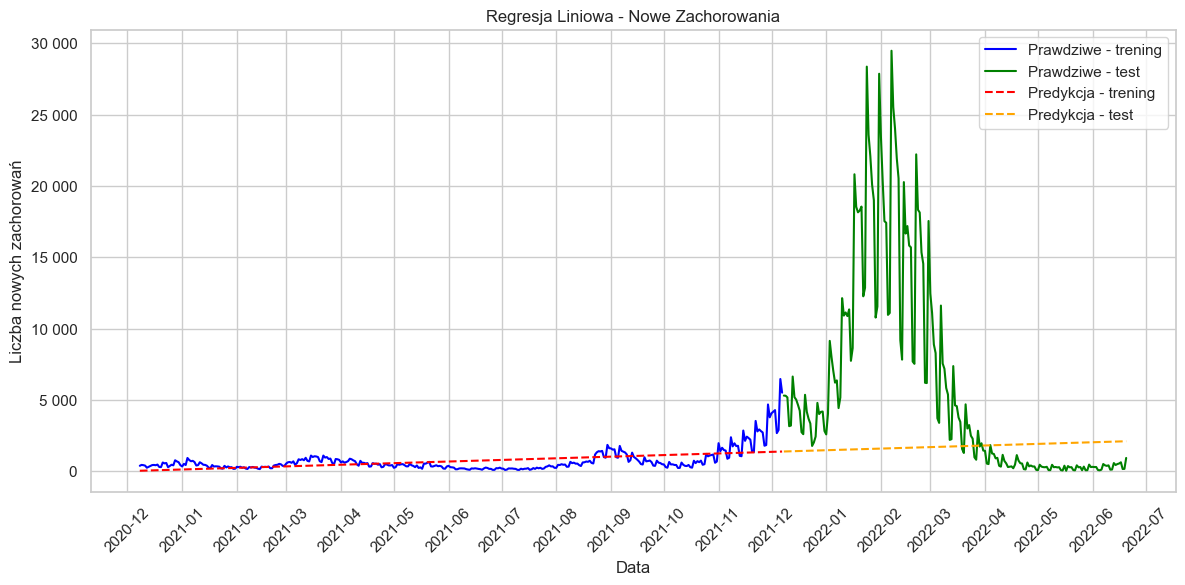

=== Regresja Liniowa - Nowe Zgony ===
R2 (test): -0.0643
MSE (test): 999.54



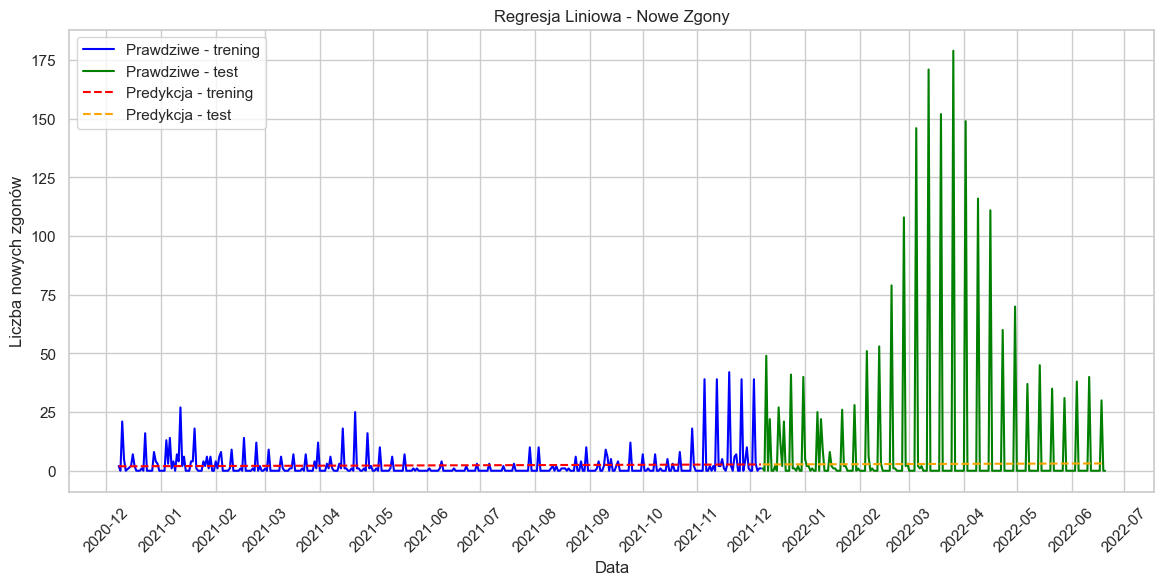

=== Regresja Liniowa - Nowe Szczepienia ===
R2 (test): -200.1795
MSE (test): 99843558.53



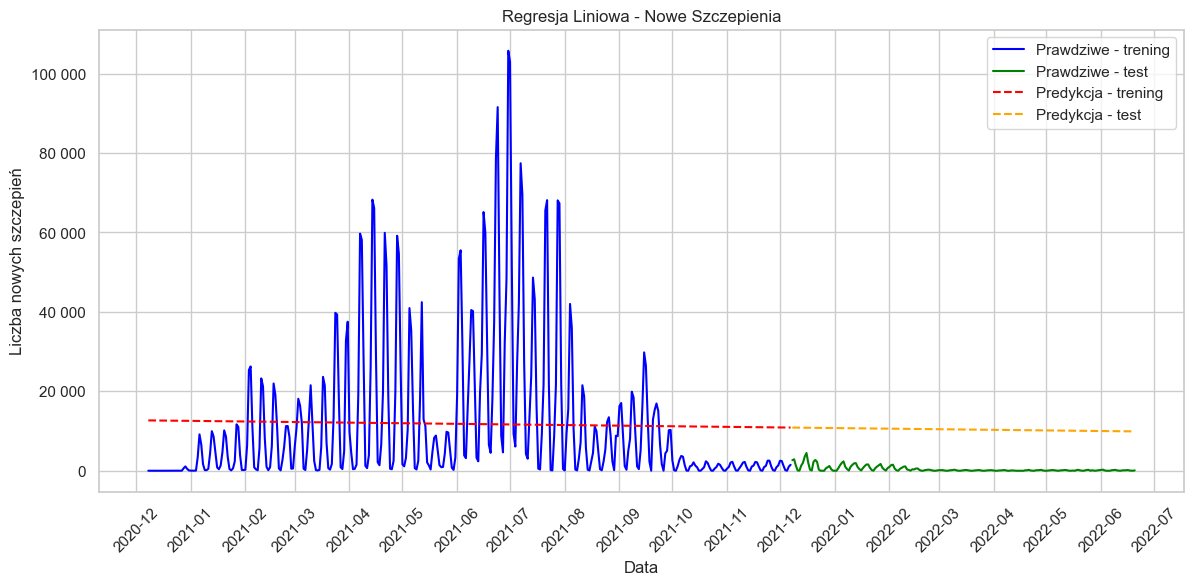

=== Regresja Liniowa - Nowe Pełne Szczepienia ===
R2 (test): -189.5692
MSE (test): 374587030.59



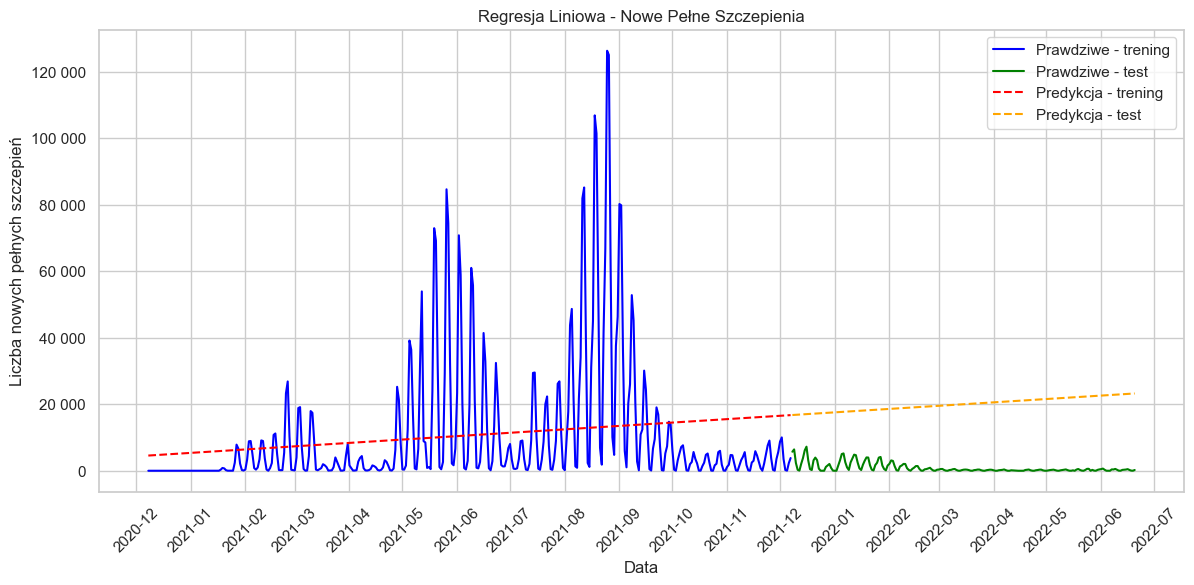

=== Regresja Liniowa - Nowe Testy ===
R2 (test): 0.0693
MSE (test): 153973989.52



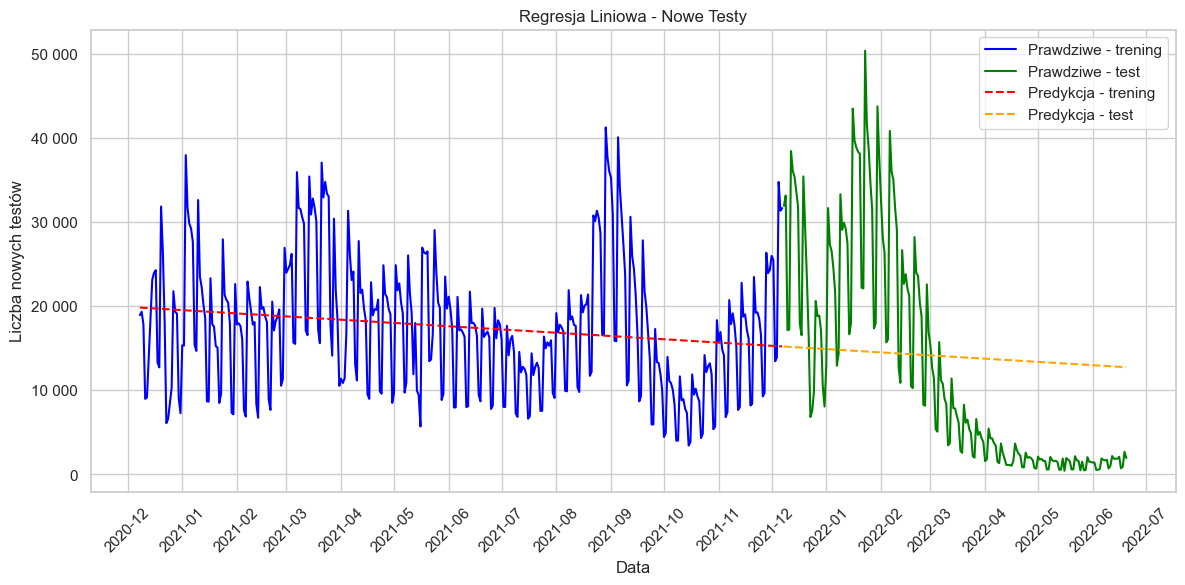

In [80]:

train_start = pd.to_datetime('2020-12-08')
train_end = pd.to_datetime('2021-12-07')
test_start = pd.to_datetime('2021-12-08')

df_train = df_europe_ex3[(df_europe_ex3['date'] >= train_start) & (df_europe_ex3['date'] <= train_end)].copy()
df_test = df_europe_ex3[df_europe_ex3['date'] >= test_start].copy()

df_train['New_persons_fully_vaccinated'] = df_train['New_persons_fully_vaccinated'].fillna(0)
df_test['New_persons_fully_vaccinated'] = df_test['New_persons_fully_vaccinated'].fillna(0)

def prepare_X(df):
    return (df['date'] - train_start).dt.days.values.reshape(-1, 1)

X_train = prepare_X(df_train)
X_test = prepare_X(df_test)


def run_regression(y_train, y_test, title, y_label):
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print(f'=== {title} ===')
    print(f'R2 (test): {r2_score(y_test, y_pred_test):.4f}')
    print(f'MSE (test): {mean_squared_error(y_test, y_pred_test):.2f}')
    print()

    plt.figure(figsize=(14,6))
    plt.plot(df_train['date'], y_train, label='Prawdziwe - trening', color='blue')
    plt.plot(df_test['date'], y_test, label='Prawdziwe - test', color='green')
    plt.plot(df_train['date'], y_pred_train, label='Predykcja - trening', linestyle='--', color='red')
    plt.plot(df_test['date'], y_pred_test, label='Predykcja - test', linestyle='--', color='orange')
    plt.title(title)
    plt.xlabel('Data')
    plt.ylabel(y_label)
    plt.ticklabel_format(style='plain', axis='y')
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'.replace(',', ' ')))
    ax.tick_params(axis='x', rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()


run_regression(
    y_train = df_train['Total_confirmed_cases'],
    y_test = df_test['Total_confirmed_cases'],
    title = 'Regresja Liniowa - Nowe Zachorowania',
    y_label = 'Liczba nowych zachorowań'
)

run_regression(
    y_train = df_train['Total_new_deceased'],
    y_test = df_test['Total_new_deceased'],
    title = 'Regresja Liniowa - Nowe Zgony',
    y_label = 'Liczba nowych zgonów'
)

run_regression(
    y_train = df_train['Total_new_vaccinations'],
    y_test = df_test['Total_new_vaccinations'],
    title = 'Regresja Liniowa - Nowe Szczepienia',
    y_label = 'Liczba nowych szczepień'
)


run_regression(
    y_train = df_train['New_persons_fully_vaccinated'],
    y_test = df_test['New_persons_fully_vaccinated'],
    title = 'Regresja Liniowa - Nowe Pełne Szczepienia',
    y_label = 'Liczba nowych pełnych szczepień'
)

run_regression(
    y_train = df_train['Total_tested'],
    y_test = df_test['Total_tested'],
    title = 'Regresja Liniowa - Nowe Testy',
    y_label = 'Liczba nowych testów'
)


# Część 5

=== Regresja Liniowa - Nowe Zachorowania ===
Włochy - R2 (test): -4.3702
Włochy - MSE (test): 46067752.56
Brazylia - R2 (test): -6.7819
Brazylia - MSE (test): 2404176596.20



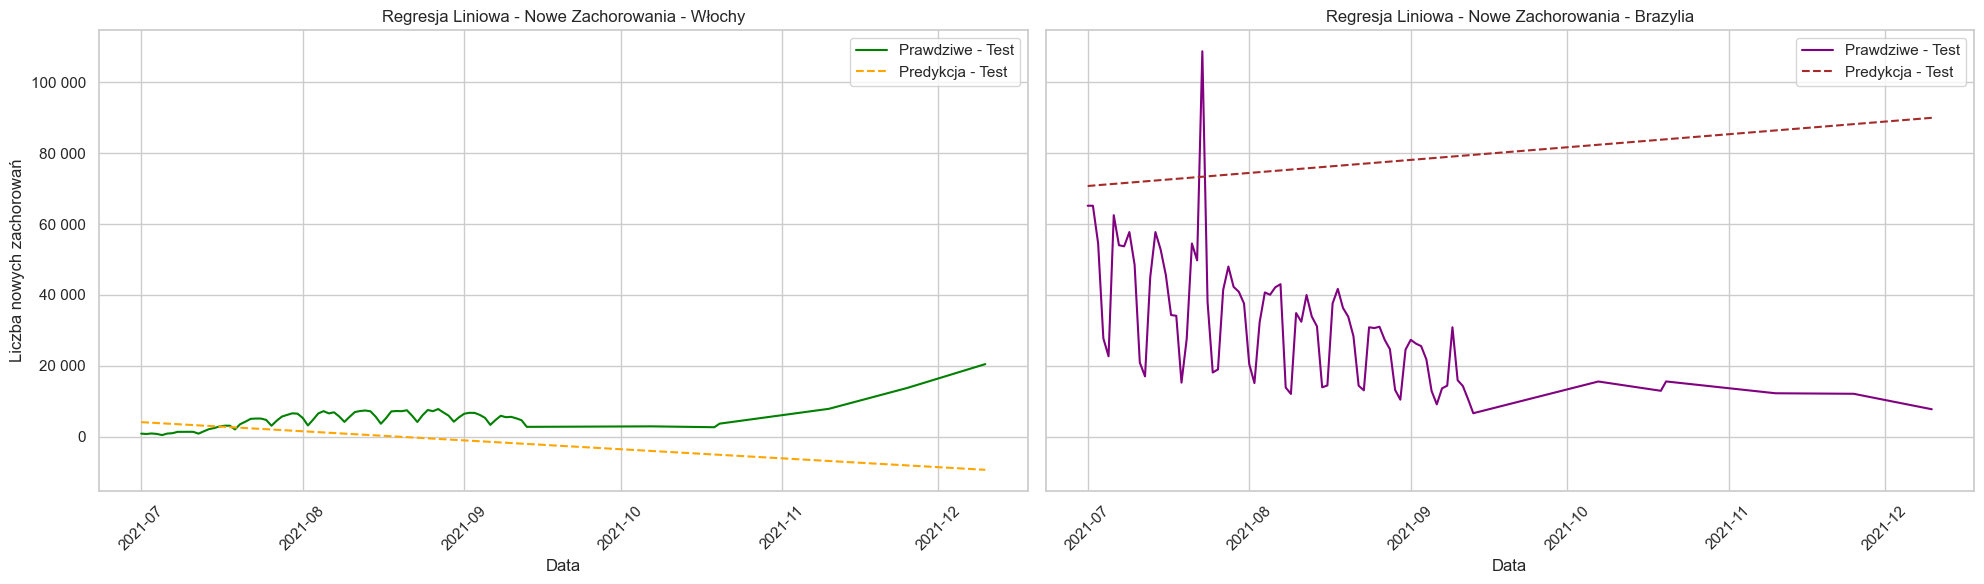

=== Regresja Liniowa - Nowe Zgony ===
Włochy - R2 (test): -26.1879
Włochy - MSE (test): 13252.38
Brazylia - R2 (test): -17.5890
Brazylia - MSE (test): 3916950.52



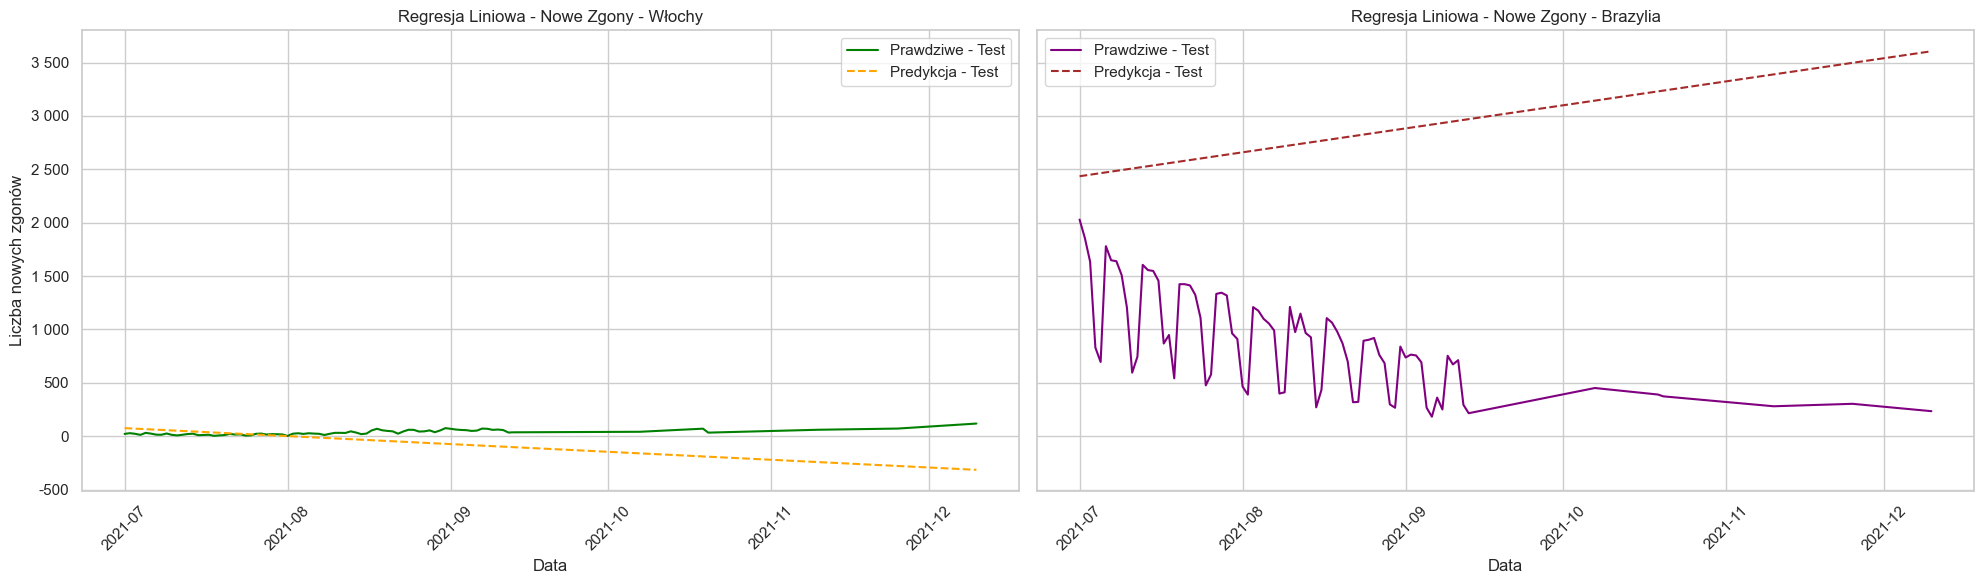

=== Regresja Liniowa - Nowe Szczepienia ===
Włochy - R2 (test): -69.4471
Włochy - MSE (test): 138083748655.80
Brazylia - R2 (test): -1.0094
Brazylia - MSE (test): 329376449774.58



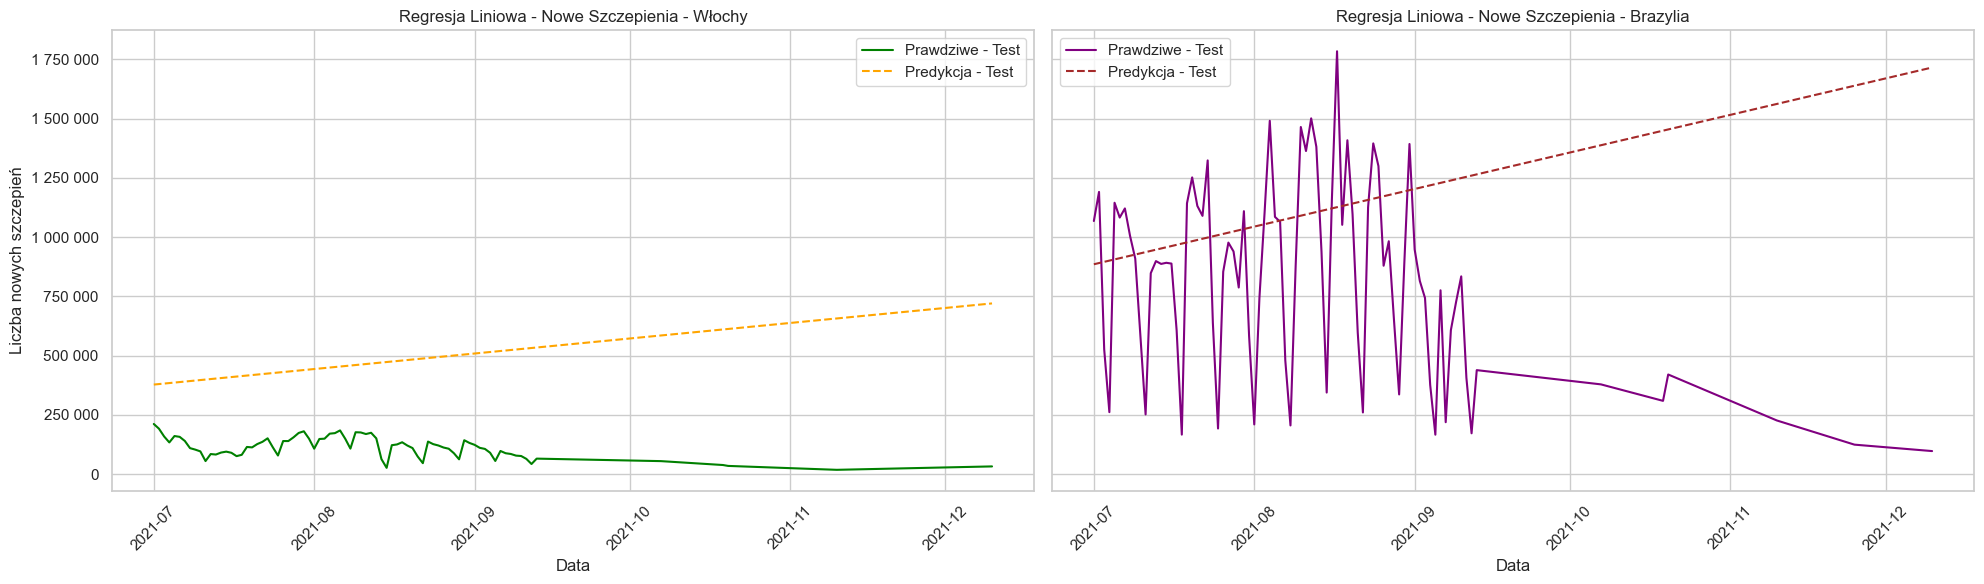

=== Regresja Liniowa - Nowe Pełne Szczepienia ===
Włochy - R2 (test): -0.6124
Włochy - MSE (test): 33019985960.19
Brazylia - R2 (test): -0.5265
Brazylia - MSE (test): 211610646360.19



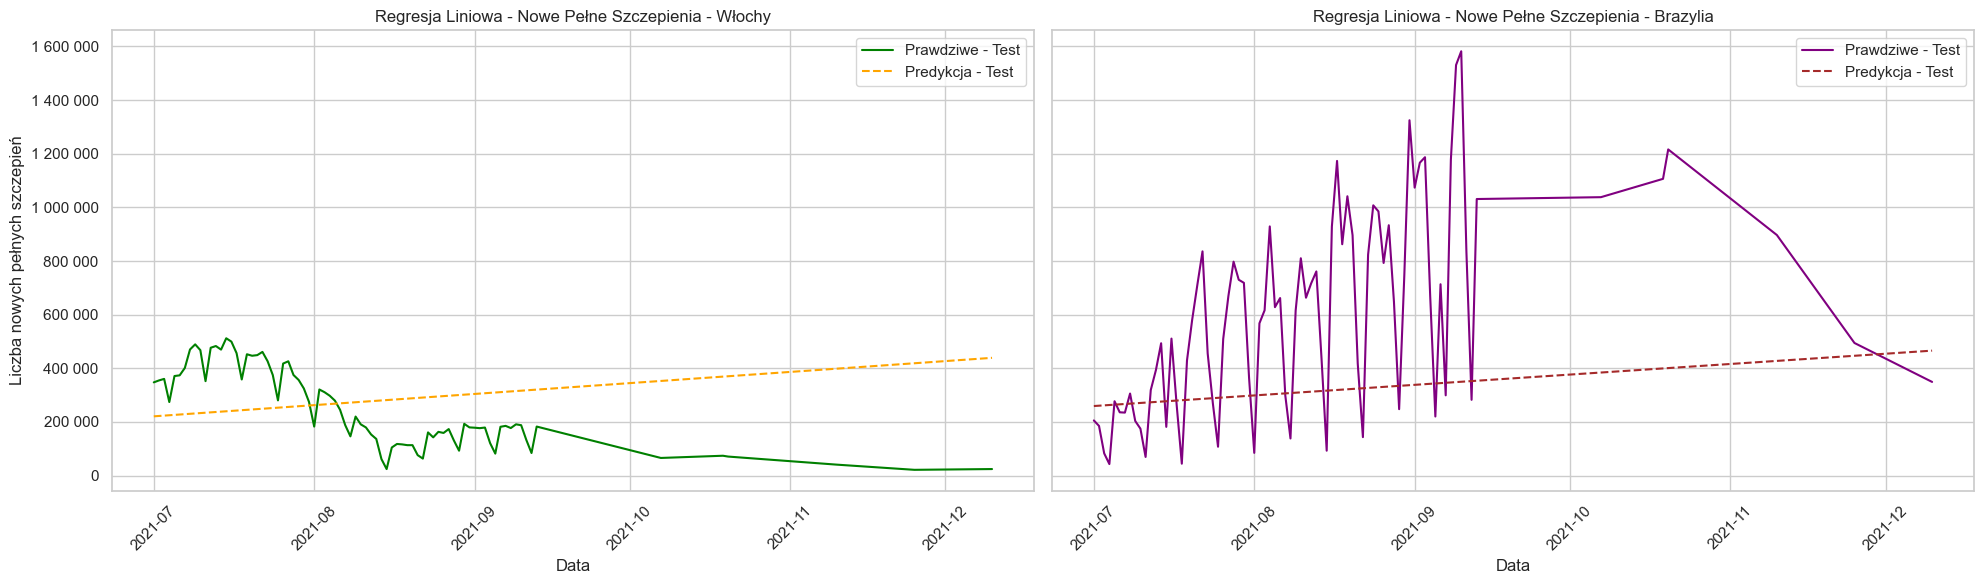

=== Regresja Liniowa - Nowe Testy ===
Włochy - R2 (test): -0.0072
Włochy - MSE (test): 13232681691.42
Brazylia - R2 (test): -14.8097
Brazylia - MSE (test): 10031930154.59



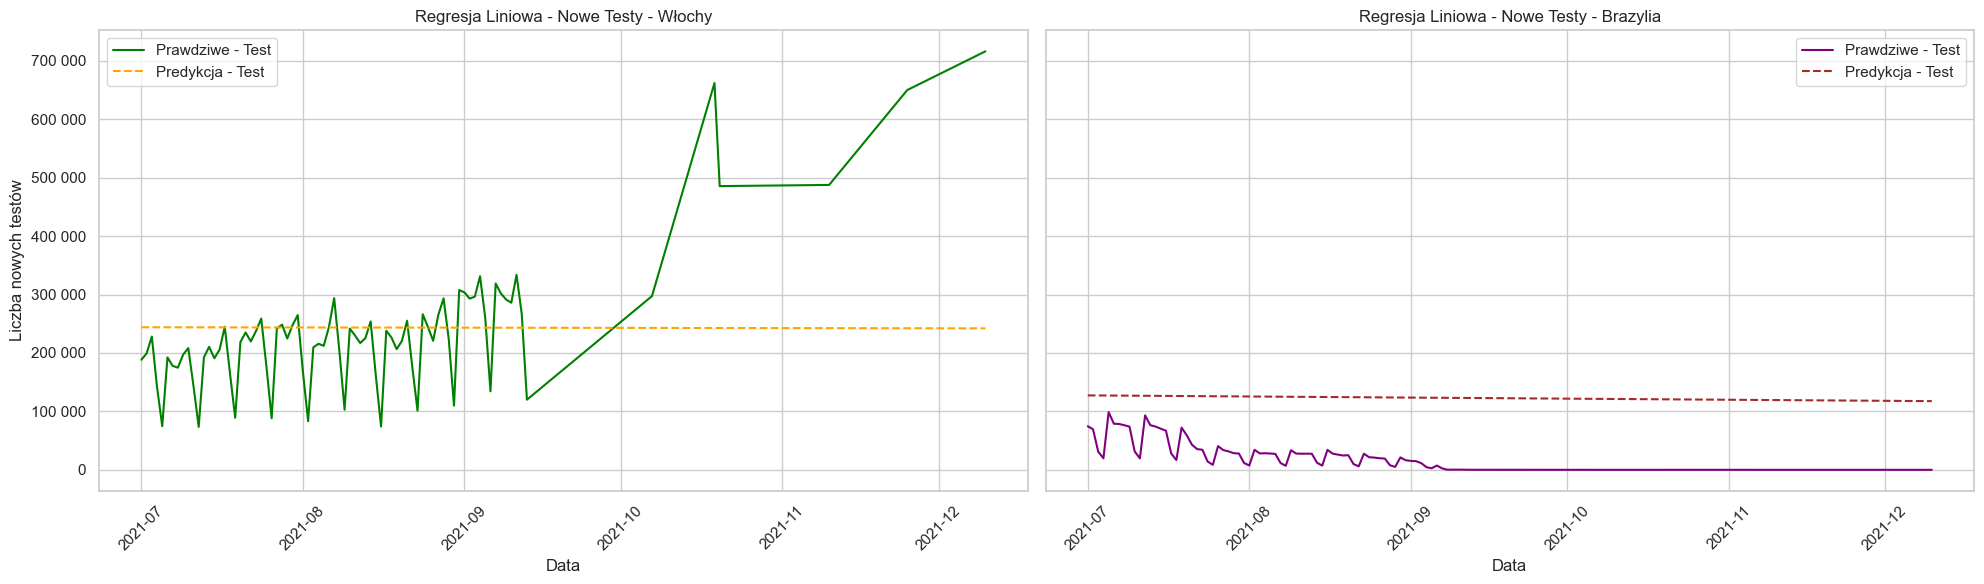

In [85]:
# Zakładamy, że dane są załadowane: df_data

# Ustawienia dat
train_start = pd.to_datetime('2020-07-01')
train_end = pd.to_datetime('2021-06-30')
test_start = pd.to_datetime('2021-07-01')

# Wybór danych Włochy i Brazylia
df_italy = df_data[df_data['Country_name'] == 'Italy'].copy()
df_brazil = df_data[df_data['Country_name'] == 'Brazil'].copy()

# Upewnienie się, że format daty jest poprawny
df_italy['date'] = pd.to_datetime(df_italy['date'])
df_brazil['date'] = pd.to_datetime(df_brazil['date'])

# WYBÓR wspólnych dat
common_dates = sorted(set(df_italy['date']) & set(df_brazil['date']))

# Filtrowanie tylko tych wspólnych dat
df_italy = df_italy[df_italy['date'].isin(common_dates)].copy()
df_brazil = df_brazil[df_brazil['date'].isin(common_dates)].copy()

# I teraz dopiero dzielimy dane na treningowe i testowe
df_italy_train = df_italy[(df_italy['date'] >= train_start) & (df_italy['date'] <= train_end)].copy()
df_italy_test = df_italy[df_italy['date'] >= test_start].copy()

df_brazil_train = df_brazil[(df_brazil['date'] >= train_start) & (df_brazil['date'] <= train_end)].copy()
df_brazil_test = df_brazil[df_brazil['date'] >= test_start].copy()

# Uzupełnienie brakujących wartości
columns_to_fill = [
    'Total_confirmed_cases', 
    'Total_new_deceased', 
    'Total_new_vaccinations', 
    'New_persons_fully_vaccinated', 
    'Total_tested'
]

for col in columns_to_fill:
    for df in [df_italy_train, df_italy_test, df_brazil_train, df_brazil_test]:
        df[col] = df[col].fillna(0)

# Funkcja przygotowująca zmienną niezależną X (czas)
def prepare_X(df, start_date):
    return (df['date'] - start_date).dt.days.values.reshape(-1, 1)

# Przygotowanie X
X_italy_train = prepare_X(df_italy_train, train_start)
X_italy_test = prepare_X(df_italy_test, train_start)

X_brazil_train = prepare_X(df_brazil_train, train_start)
X_brazil_test = prepare_X(df_brazil_test, train_start)

def run_regression(y_italy_train, y_italy_test, y_brazil_train, y_brazil_test, title, y_label):
    model = LinearRegression()

    # Włochy - trening
    model.fit(X_italy_train, y_italy_train)
    y_pred_italy_test = model.predict(X_italy_test)

    # Brazylia - trening
    model.fit(X_brazil_train, y_brazil_train)
    y_pred_brazil_test = model.predict(X_brazil_test)

    # Wyniki
    print(f'=== {title} ===')
    print(f'Włochy - R2 (test): {r2_score(y_italy_test, y_pred_italy_test):.4f}')
    print(f'Włochy - MSE (test): {mean_squared_error(y_italy_test, y_pred_italy_test):.2f}')
    print(f'Brazylia - R2 (test): {r2_score(y_brazil_test, y_pred_brazil_test):.4f}')
    print(f'Brazylia - MSE (test): {mean_squared_error(y_brazil_test, y_pred_brazil_test):.2f}')
    print()

    # Wykresy
    fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

    # Włochy
    axs[0].plot(df_italy_test['date'], y_italy_test, label='Prawdziwe - Test', color='green')
    axs[0].plot(df_italy_test['date'], y_pred_italy_test, '--', label='Predykcja - Test', color='orange')
    axs[0].set_title(f'{title} - Włochy')
    axs[0].set_xlabel('Data')
    axs[0].set_ylabel(y_label)
    axs[0].legend()
    axs[0].grid(True)
    axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'.replace(',', ' ')))
    axs[0].tick_params(axis='x', rotation=45)

    # Brazylia
    axs[1].plot(df_brazil_test['date'], y_brazil_test, label='Prawdziwe - Test', color='purple')
    axs[1].plot(df_brazil_test['date'], y_pred_brazil_test, '--', label='Predykcja - Test', color='brown')
    axs[1].set_title(f'{title} - Brazylia')
    axs[1].set_xlabel('Data')
    axs[1].legend()
    axs[1].grid(True)
    axs[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axs[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# ====== WYKONANIE REGRESJI dla różnych zmiennych =======

# Nowe zachorowania
run_regression(
    y_italy_train = df_italy_train['Total_confirmed_cases'],
    y_italy_test = df_italy_test['Total_confirmed_cases'],
    y_brazil_train = df_brazil_train['Total_confirmed_cases'],
    y_brazil_test = df_brazil_test['Total_confirmed_cases'],
    title = 'Regresja Liniowa - Nowe Zachorowania',
    y_label = 'Liczba nowych zachorowań'
)

# Nowe zgony
run_regression(
    y_italy_train = df_italy_train['Total_new_deceased'],
    y_italy_test = df_italy_test['Total_new_deceased'],
    y_brazil_train = df_brazil_train['Total_new_deceased'],
    y_brazil_test = df_brazil_test['Total_new_deceased'],
    title = 'Regresja Liniowa - Nowe Zgony',
    y_label = 'Liczba nowych zgonów'
)

# Nowe szczepienia
run_regression(
    y_italy_train = df_italy_train['Total_new_vaccinations'],
    y_italy_test = df_italy_test['Total_new_vaccinations'],
    y_brazil_train = df_brazil_train['Total_new_vaccinations'],
    y_brazil_test = df_brazil_test['Total_new_vaccinations'],
    title = 'Regresja Liniowa - Nowe Szczepienia',
    y_label = 'Liczba nowych szczepień'
)

# Nowe pełne szczepienia
run_regression(
    y_italy_train = df_italy_train['New_persons_fully_vaccinated'],
    y_italy_test = df_italy_test['New_persons_fully_vaccinated'],
    y_brazil_train = df_brazil_train['New_persons_fully_vaccinated'],
    y_brazil_test = df_brazil_test['New_persons_fully_vaccinated'],
    title = 'Regresja Liniowa - Nowe Pełne Szczepienia',
    y_label = 'Liczba nowych pełnych szczepień'
)

# Nowe testy
run_regression(
    y_italy_train = df_italy_train['Total_tested'],
    y_italy_test = df_italy_test['Total_tested'],
    y_brazil_train = df_brazil_train['Total_tested'],
    y_brazil_test = df_brazil_test['Total_tested'],
    title = 'Regresja Liniowa - Nowe Testy',
    y_label = 'Liczba nowych testów'
)